# Coupled oscillators 
and other wigglers

In [1]:
from scipy.integrate import solve_ivp
from numpy import *
import matplotlib.pyplot as plt
from physconsts import g

## simple pendulum check

In [23]:
l = 1
def deriv(t, state):
    theta, thetadot = state
    return thetadot, -(g/l)*sin(theta)
tspan = [0, g/l]
tsteps = linspace(tspan[0],tspan[1],100)
state0 = [-pi/4,0]
soln = solve_ivp(deriv, tspan, state0, t_eval=tsteps)

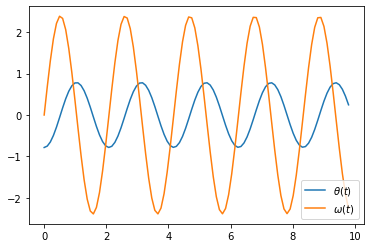

In [25]:
labels = [r'$\theta(t)$','$\omega(t)$']
for y,l in zip(soln.y, labels):
    plt.plot(soln.t,y,label=l)
plt.legend()

## coupled pendula

In [128]:
l = .5 # pendula rod length
alpha = 0.5 # damping factor for coupling rod motion
m = 1 # pendula mass
M = 2 # rod mass

def deriv(t, state):
    """
    Args:
        t: float, the current time
        state: list-like, a system of position and first derivatives
        for the system of a rod (x) and pendula (ti), [x, xdot, t1, t1dot,..., tn, tndot]
    Return:
        derivs: [xdot, xdoubledot, t1dot, t1doubledot,..., tndot, tndoubledot]
    """
    x,xdot = state[:2]
    pendula = state[2:]
    th_arr = array([pendula[2*i] for i in range(len(pendula)//2)])
    thdot_arr = array([pendula[2*i+1] for i in range(len(pendula)//2)])
    pendula = zip(th_arr,thdot_arr)
    
    pendula_deriv = array([(thdot, ((2*alpha*x/l)*(1-(m/M)*thdot**2)-(g/l)*sin(th))/(1-(m/M)*cos(th)))
                           for th,thdot in pendula]).flatten()
    
    rod_deriv = array([xdot, (-2*alpha*x-(m/M)*sum([(g-l*thdot**2)*sin(th) for th,thdot in pendula]))
                               /(1-(m/M)*sum([cos(th) for th in th_arr]))])
    
    return append(rod_deriv, pendula_deriv) 

oscillators = 4
pendula_state0 = array([[random.rand()*pi/2 - pi/4, 0] for i in range(oscillators)]).flatten()
rod_state0 = array([0,0])
state0 = append(rod_state0,pendula_state0)

tspan = [0, 2*g/l]
tsteps = linspace(tspan[0],tspan[1],500)
soln = solve_ivp(deriv, tspan, state0, t_eval=tsteps)

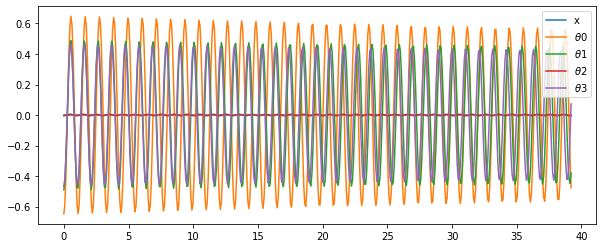

In [129]:
labels = ['x','vx'] + \
         list(array([[rf'$\theta${i}',f'$\omega${i}'] for i in range(oscillators)]).flatten())
i=0

fig,ax = plt.subplots(**{'figsize':(10,4)})
for y,l in zip(soln.y, labels):
    if not i % 2:
        ax.plot(soln.t,y,label=l)
    i += 1
ax.legend(loc='upper right')